# Atividade Prática 2.2 - CIFAR 10

* Disciplina _Inteligência Artificial Aplicada_
* Professora: Elloá B. Guedes (ebgcosta@uea.edu.br)
* Data de apresentação: 26 de janeiro de 2024
* Data limite de entrega: 01 de fevereiro de 2024


## Equipe
* Integrante 1: *seu nome aqui*
* Integrante 2: *seu nome aqui*


## Contexto: Classificação de Imagens

O CIFAR-10 é um conjunto de dados amplamente utilizado na comunidade de aprendizado de máquina e visão computacional para fins de treinamento e avaliação de algoritmos de classificação de imagem. O nome "CIFAR" é uma abreviação de "Canadian Institute for Advanced Research" (Instituto Canadense de Pesquisa Avançada), que é a organização que inicialmente coletou e disponibilizou esse conjunto de dados.

## Base de Dados

Disponível em: https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
import keras

In [ ]:
## Abrir a base de dados
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

## Análise exploratória

1. Quantos exemplos há no conjunto de treino?
2. Quantos exemplos há no conjunto de teste?
3. Imprima o exemplo 42 do conjunto de treinamento.
4. Quantas classes há na tarefa? Qual a nomenclatura?
5. Imprima uma amostra de exemplos do conjunto de treinamento
6. As classes estão balanceadas no treinamento?


In [ ]:
import matplotlib.pyplot as plt
for i in range(9):
 plt.subplot(330 + 1 + i)
 plt.imshow(X_train[i])
plt.show()

## Normalização dos dados de treinamento

Para uma melhor performance dos modelos de Redes Neurais no treinamento em bases de dados grandes, o ideal é que os valores de entrada estejam no intervalo [0,1]


 Relembre que neste cenário que as entradas são matrizes 28x28 de pixels e que o maior valor que um pixel pode assumir é 255

In [ ]:
X_train, X_test = X_train/255, X_test/255

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

## Definição do modelo

Vamos construir uma Rede Neural Convolucional simples, lembrando que:

- A dimensão da entrada é 28x28x1.
- A Rede convolucional possui estrutura sequencial.
- O problema é relativamente simples, pois não há informações de cores.  

Essa rede neural terá as seguintes camadas:

1. Camada convolucional 2D com 32 neurônios, função relu e filtros (3,3)
2. Camada MaxPooling 2D com filtros 2x2
3. Camada Flatten
4. Rede Neural MLP com 2 camadas para classificar as características extraídas.
  - Camanda Densa com 100 neurônios e função de ativação ReLU.
  -  Camanda Densa com 1 neurônio para cada classe do problema e função de ativação softmax.


In [ ]:
INPUT_SHAPE = (32, 32, 3)
BATCH_SIZE = 32
EPOCHS = 10

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=INPUT_SHAPE))
model.add(keras.layers.MaxPool2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(metrics=['accuracy'], loss='categorical_crossentropy')


## Visualize a quantidade de parâmetros que o modelo possui

In [ ]:
model.summary()

## Treinamento do Modelo

Efetue o treinamento do modelo com os seguintes parâmetros:

- Épocas: 20
- batch_size = 32
- validation_split = 0.1
- verbose = 1

In [84]:
model.fit(X_train, y_train, BATCH_SIZE, EPOCHS, 1, validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 22s 16ms/step - loss: 0.3541 - accuracy: 0.8807 - val_loss: 1.5319 - val_accuracy: 0.6396
Epoch 2/10
 139/1407 [=>............................] - ETA: 19s - loss: 0.2601 - accuracy: 0.9123

KeyboardInterrupt: 

## Visualize os gráficos de treinamento do modelo

- Perda (loss)
- Acurácia

In [ ]:
from matplotlib import pyplot as plt

In [85]:
model.history.history

{'loss': [0.35414639115333557],
 'accuracy': [0.8807111382484436],
 'val_loss': [1.5318982601165771],
 'val_accuracy': [0.6395999789237976]}

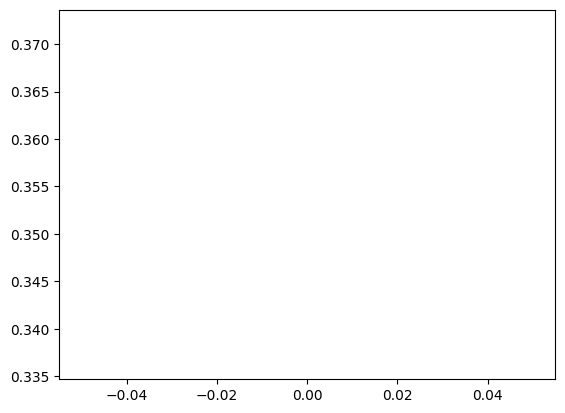

In [86]:
plt.plot(model.history.history['loss'], color='b')
plt.show()

## Análise de Desempenho

Efetue a previsão do modelo para o conjunto de testes e calcule as seguintes métricas

- Acurácia
- F1-Score

Visualize também a matriz de confusão para as previsões efetuadas

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

In [ ]:
y_prev = model.predict(X_test)
y_prev = np.argmax(y_prev, axis=1)
y_test = np.argmax(y_test, axis=1)


In [ ]:
accuracy_score(y_test, y_prev)

In [ ]:
f1_score(y_test, y_prev, average='macro')

## Previsões com a MobileNet

A MobileNet é uma arquitetura de rede neural convolucional (CNN) projetada para aplicações de visão computacional em dispositivos móveis e com recursos limitados de computação. Ela foi desenvolvida pelo Google em 2017 para atender à crescente demanda por modelos de aprendizado profundo eficientes em termos de computação e recursos para dispositivos móveis, como smartphones e tablets.

O principal objetivo do MobileNet é oferecer desempenho suficiente para tarefas de visão computacional, como detecção de objetos e reconhecimento de imagem, enquanto mantém uma arquitetura leve e eficiente.

Consulte: https://keras.io/api/applications/mobilenet/